In [ ]:
!pip install seaborn matplotlib

In [25]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('01.csv', sep=';')



In [34]:
print(df.columns)

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')


In [51]:
df_ceara = df[df['Estado - Sigla']=='CE'].copy()
#print(df_ceara)


In [ ]:
#df_ceara['Data'] = pd.to_datetime(df_ceara['Data da Coleta'])
df.info()


In [53]:
df_ceara['Data da Coleta'] = pd.to_datetime(df_ceara['Data da Coleta'],errors='coerce')
df_ceara.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11429 entries, 107 to 421341
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Regiao - Sigla     11429 non-null  object        
 1   Estado - Sigla     11429 non-null  object        
 2   Municipio          11429 non-null  object        
 3   Revenda            11429 non-null  object        
 4   CNPJ da Revenda    11429 non-null  object        
 5   Nome da Rua        11429 non-null  object        
 6   Numero Rua         11429 non-null  object        
 7   Complemento        2009 non-null   object        
 8   Bairro             11415 non-null  object        
 9   Cep                11429 non-null  object        
 10  Produto            11429 non-null  object        
 11  Data da Coleta     4609 non-null   datetime64[ns]
 12  Valor de Venda     11429 non-null  object        
 13  Valor de Compra    0 non-null      float64       
 14  Unidade 

In [54]:
df_ceara['Valor de Venda'] = df_ceara['Valor de Venda'].str.replace(',','.').astype(float)

In [55]:
df_ceara.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11429 entries, 107 to 421341
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Regiao - Sigla     11429 non-null  object        
 1   Estado - Sigla     11429 non-null  object        
 2   Municipio          11429 non-null  object        
 3   Revenda            11429 non-null  object        
 4   CNPJ da Revenda    11429 non-null  object        
 5   Nome da Rua        11429 non-null  object        
 6   Numero Rua         11429 non-null  object        
 7   Complemento        2009 non-null   object        
 8   Bairro             11415 non-null  object        
 9   Cep                11429 non-null  object        
 10  Produto            11429 non-null  object        
 11  Data da Coleta     4609 non-null   datetime64[ns]
 12  Valor de Venda     11429 non-null  float64       
 13  Valor de Compra    0 non-null      float64       
 14  Unidade 

In [56]:
df_ceara['Ano_Mes'] = df_ceara['Data da Coleta'].dt.to_period('M')


In [57]:
precos_agrupados = df_ceara.groupby(['Produto', 'Ano_Mes'])['Valor de Venda'].mean().reset_index()


In [60]:
precos_agrupados['Ano_Mes'] = precos_agrupados['Ano_Mes'].astype(str)

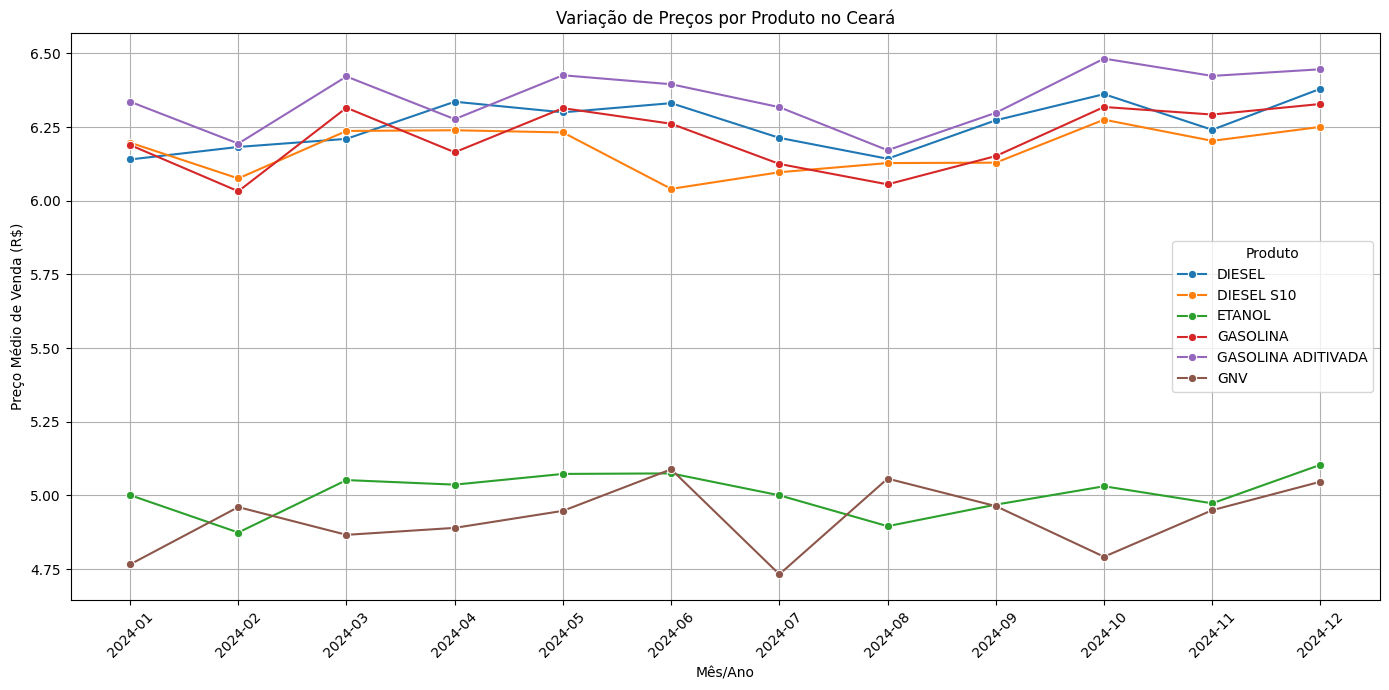

In [61]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=precos_agrupados, x='Ano_Mes', y='Valor de Venda', hue='Produto', marker='o')
plt.title('Variação de Preços por Produto no Ceará')
plt.xlabel('Mês/Ano')
plt.ylabel('Preço Médio de Venda (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Produto')
plt.tight_layout()
plt.show()